In [100]:
import numpy as np
import os
from copy import deepcopy

experiment_directory = '../experiments'

In [148]:
# Define and load data
from glob import glob
import re

# define the experiments that should be loaded either manually or load all
experiment_definitions = dict()

exp_directories = glob(os.path.join(experiment_directory, 'experiment_*' ))
for exp_directory in np.sort(exp_directories):
    
    experiment_definition = dict()
       
    experiment_definition['directory'] = exp_directory
    experiment_definition['id'] = int(re.findall(r'\d+', os.path.basename(exp_directory))[0])
    experiment_definition['name'] = 'exp ' + str(experiment_definition['id'])
    
    experiment_definitions[experiment_definition['id']] = experiment_definition
    
    
# load the statistics 
def load_statistics(experiment_directory):
    statistics = dict()

    if not os.path.isdir(experiment_directory):
        raise ValueError('Directory {!r} does not exist!'.format(experiment_directory))

    for file in glob(os.path.join(experiment_directory, 'statistics', '*.npy')):
        stat_name = os.path.splitext(os.path.basename(file))[0]
        stat_val = np.load(file)

        if len(stat_val.shape) == 0:
            stat_val = stat_val.dtype.type(stat_val)

        statistics[stat_name] = stat_val

    for file in glob(os.path.join(experiment_directory, 'statistics', '*.npz')):
        stat_name = os.path.splitext(os.path.basename(file))[0]
        stat_vals = dict(np.load(file))

        # numpy encapsulates scalars as darrays with an empty shape
        # recover the original type
        for substat_name, substat_val in stat_vals.items():
            if len(substat_val.shape) == 0:
                stat_vals[substat_name] = substat_val.dtype.type(substat_val)

        statistics[stat_name] = stat_vals

    return statistics   


experiment_data = dict()
for experiment_definition in experiment_definitions.values():
    experiment_data[experiment_definition['id']] = load_statistics(experiment_definition['directory']) 
    
print('Loaded data from {} experiments ...'.format(len(experiment_data)))

Loaded data from 12 experiments ...


In [102]:
# visualization
import matplotlib.pyplot as plt


def plot_repetitions(data, **config):
    ax_config = config.get('ax', {'title': ''})

    fig, ax = plt.subplots()
    
    legend_strings = []
    for rep_idx in range(data.shape[0]):
        ax.plot(data[rep_idx],label='rep_{}'.format(rep_idx))
        
    ax.legend()
    ax.set(**ax_config)
    ax.grid()
    plt.show()


def plot_experiment(mean_data, std_data=None, **config):
    ax_config = config.get('ax', {'title': ''})
    show_std = config.get('show_std', True)

    fig, ax = plt.subplots()

    ax.plot(mean_data, 'k-')

    if show_std:
        plt.fill_between(list(range(len(mean_data))), mean_data - std_data, mean_data + std_data)

    ax.set(**ax_config)
    ax.grid()

    plt.show()

# Values per Run

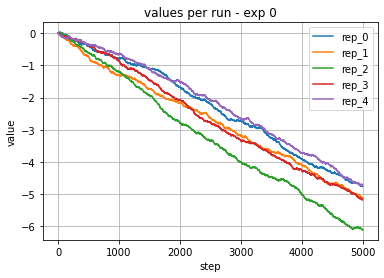

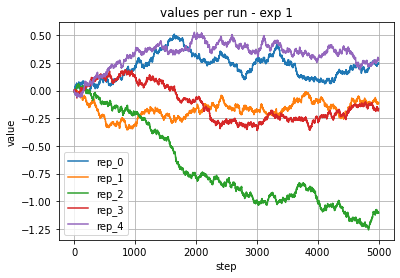

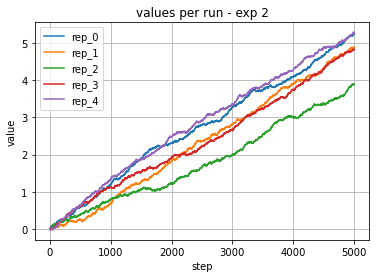

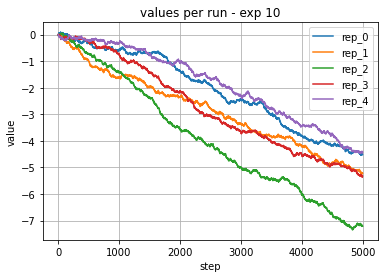

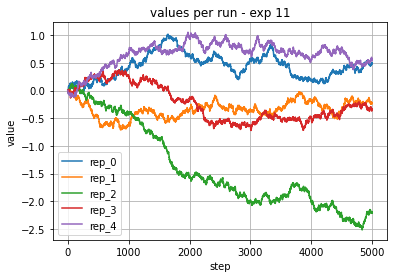

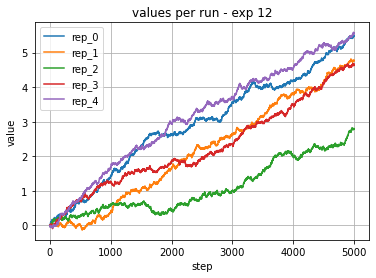

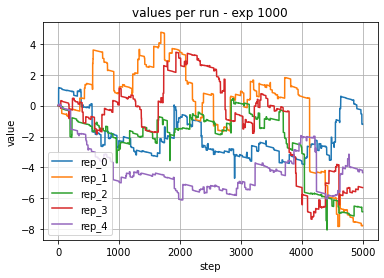

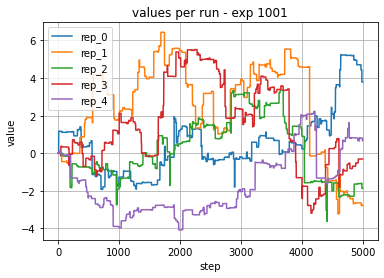

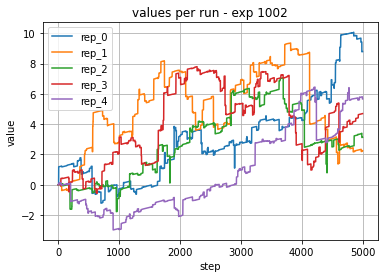

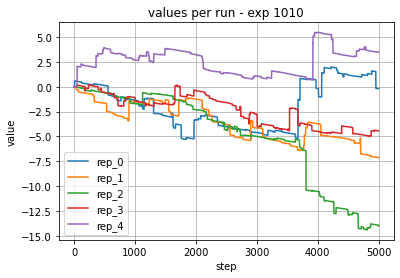

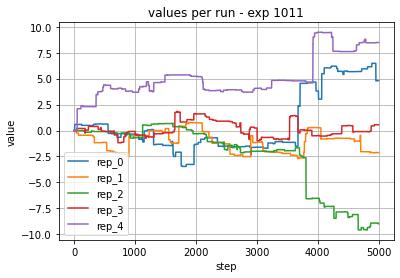

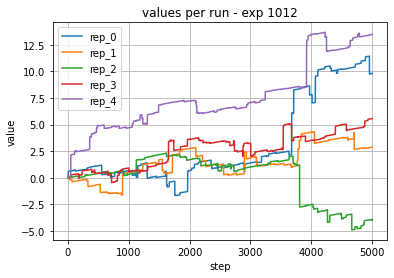

In [149]:
gui_config = {
    'ax': {
        'title': 'values per run - {}',
        'ylabel': 'value',
        'xlabel': 'step'
    }
}

for exp_id, exp_data in experiment_data.items():

    config = deepcopy(gui_config)
    config['ax']['title'] = config['ax']['title'].format(experiment_definitions[exp_id]['name'])
    
    plot_repetitions(experiment_data[exp_id]['values']['data'], **config)


# Mean Values

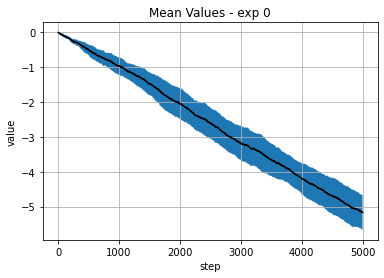

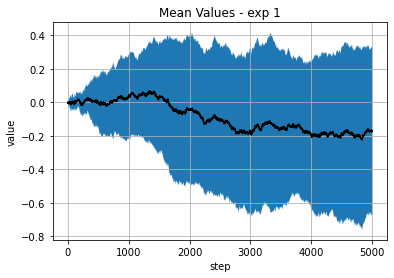

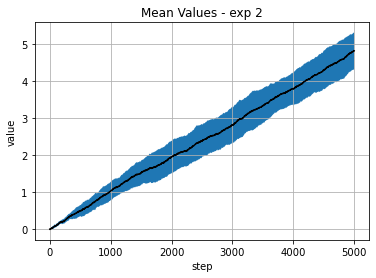

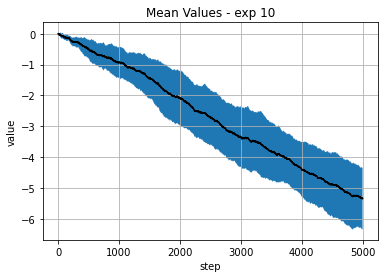

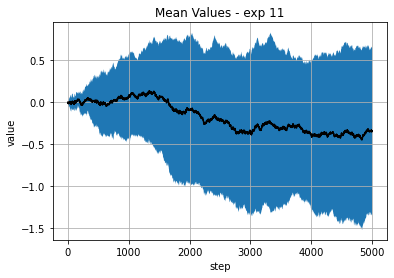

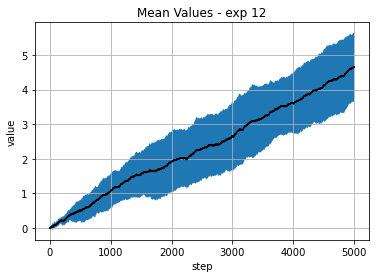

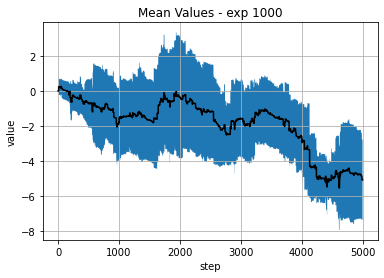

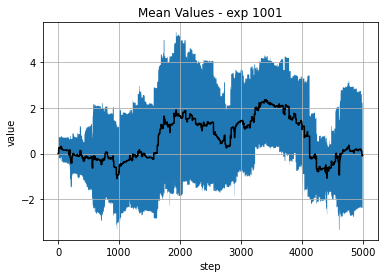

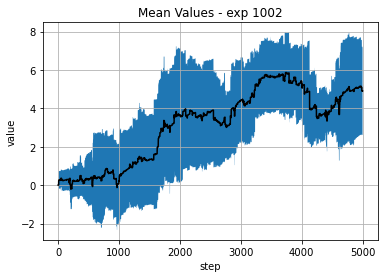

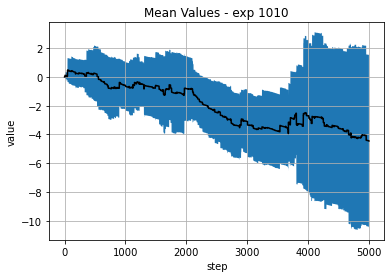

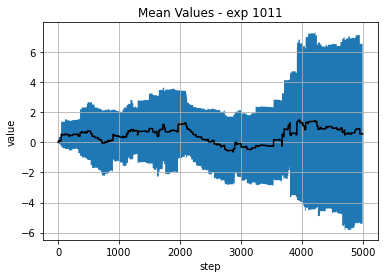

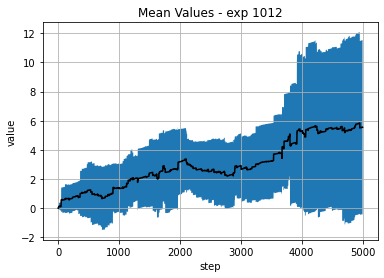

In [150]:
gui_config = {
    'ax': {
        'title': 'Mean Values - {}',
        'ylabel': 'value',
        'xlabel': 'step'
    }
}

for exp_id, exp_data in experiment_data.items():

    config = deepcopy(gui_config)
    config['ax']['title'] = config['ax']['title'].format(experiment_definitions[exp_id]['name'])
    
    plot_experiment(experiment_data[exp_id]['values']['means'],
                    experiment_data[exp_id]['values']['stds'],
                    **config)
